In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

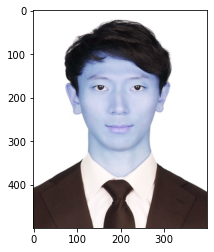

In [2]:
my_image_path = "./camera_sticker/images/image.jpg"
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr,(400,500))
img_show = img_bgr.copy()
plt.imshow(img_bgr)
plt.show()

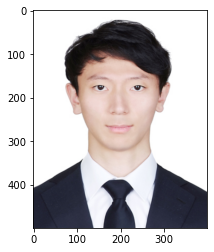

In [3]:
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [6]:
import dlib

detector_hog = dlib.get_frontal_face_detector()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)
print("🌫🛸")

🌫🛸


In [7]:
print(dlib_rects)

rectangles[[(97, 139) (283, 325)]]


<function matplotlib.pyplot.show(close=None, block=None)>

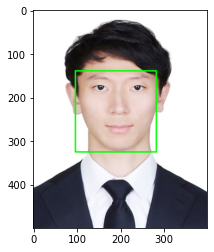

In [8]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show,(l,t),(r,b),(0,255,0),2,lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show

In [9]:
import os
model_path="./camera_sticker/models/shape_predictor_68_face_landmarks.dat"
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [10]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb,dlib_rect)
    list_points = list(map(lambda p: (p.x,p.y),points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


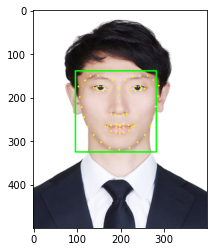

In [11]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0,255,255), -1)

img_show_rgb = cv2.cvtColor(img_show,cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [12]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.height()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(199, 227)
(x,y) : (199,134)
(w,h) : (187,187)


(31, 94, 3)


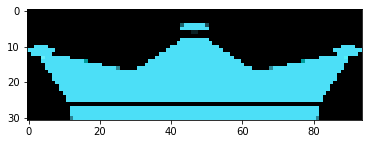

In [84]:
sticker_path = "./camera_sticker/images/king.png"
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
plt.imshow(img_sticker)
plt.show()

In [14]:
refined_x = x - w // 2  # left
refined_y = y - h       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (106,-53)


In [15]:
img_sticker = img_sticker[-refined_y:]
print (img_sticker.shape)

(134, 187, 3)


In [16]:
refined_y = 0
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (106,0)


In [17]:
sticker_area = img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

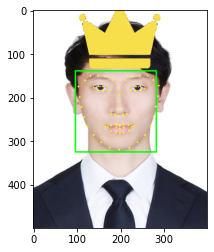

In [18]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

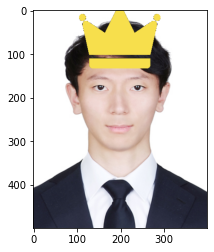

In [19]:
sticker_area = img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

In [115]:
hint 2, 36, 48, 30 번 인덱스를 이용

SyntaxError: invalid syntax (105313061.py, line 1)

In [205]:
img_rgb_cop = img_rgb.copy()

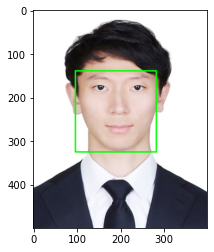

In [206]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_rgb_cop,(l,t),(r,b),(0,255,0),2,lineType=cv2.LINE_AA)
plt.imshow(img_rgb_cop)
plt.show()

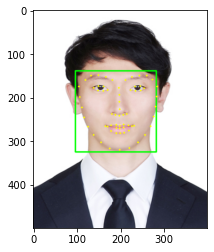

In [207]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb_cop,dlib_rect)
    list_points = list(map(lambda p: (p.x,p.y),points.parts()))
    list_landmarks.append(list_points)
    
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_rgb_cop, point, 2, (255,255,0), -1)
plt.imshow(img_rgb_cop)
plt.show()

In [208]:
refine_x_l = (2*landmark[2][0]+landmark[32][0])//3
refine_y_l = (landmark[2][1]+landmark[32][1])//2
refine_x_r = (2*landmark[14][0]+landmark[34][0])//3
refine_y_r = (landmark[50][1]+landmark[52][1])//2

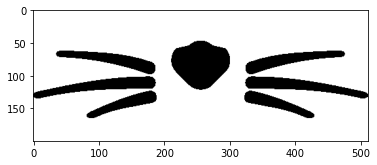

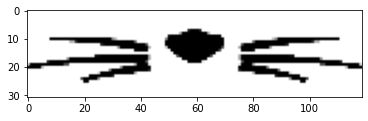

231 262
(31, 119, 3)


In [209]:
w=refine_x_r-refine_x_l
h=refine_y_r-refine_y_l
sticker_path = "./camera_sticker/images/cat.png"
img_sticker = cv2.imread(sticker_path)
img_sticker = img_sticker[150:350]
plt.imshow(img_sticker)
plt.show()


img_sticker = cv2.resize(img_sticker, (w,h))


plt.imshow(img_sticker)
plt.show()

print((landmark[2][1]+landmark[32][1])//2,(landmark[50][1]+landmark[52][1])//2)
print (img_sticker.shape)


In [210]:
sticker_area = img_rgb_cop[refine_y_l+h//4:refine_y_r+h//4, refine_x_l:refine_x_r]
img_rgb_cop[refine_y_l+h//4:refine_y_r+h//4, refine_x_l:refine_x_r] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

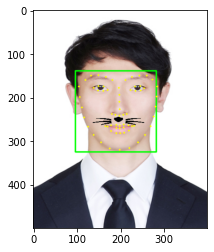

In [211]:
plt.imshow(img_rgb_cop)
plt.show()

In [219]:
img_rgb_cop = img_rgb.copy()
sticker_area = img_rgb_cop[refine_y_l+h//5:refine_y_r+h//5, refine_x_l:refine_x_r]
img_rgb_cop[refine_y_l+h//5:refine_y_r+h//5, refine_x_l:refine_x_r] = \
    np.where(img_sticker==(255,255,255),sticker_area,img_sticker).astype(np.uint8)

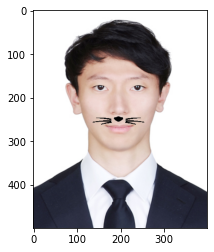

In [220]:
plt.imshow(img_rgb_cop)
plt.show()